# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [3]:
train_df = pd.read_csv("input_data/train.csv")
print("lines, columns = ",str(train_df.shape))
data_type = train_df.dtypes.reset_index()
data_type.columns = ["Column name", "Type"]
data_type

lines, columns =  (891, 12)


,Column name,Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


# Analyzing data

## Detecting NaN

In [4]:
nan = train_df.isnull().sum()
nan[nan != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beavan, Mr. William Thomas",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
train_df.drop(columns = ["PassengerId","Ticket", "Cabin"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## Function for hist

In [7]:
def hist(feature):
    data_for_hist = train_df[[feature,"Survived"]].groupby([feature], as_index=False) \
    .mean().sort_values(by="Survived",ascending=False)
    data_for_hist.plot(kind="bar",x=feature,y="Survived", title = ("Survived depend on: "+feature))
def age_hist(feature):
    grid = sns.FacetGrid(train_df, col="Survived", row=feature, height=2.2, aspect=1.6)
    grid.map(plt.hist, "Age", alpha=.5, bins=20)
    grid.add_legend()
def detailed_hist(feature):
    grid = sns.FacetGrid(train_df, row=feature, height=2.2, aspect=1.6)
    grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep", order=[1,2,3], hue_order=["female","male"])
    grid.add_legend()

## Class/Survived

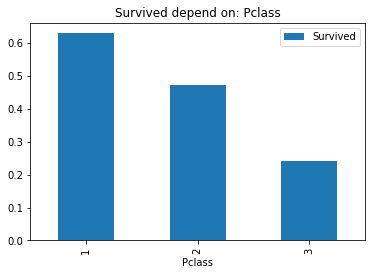

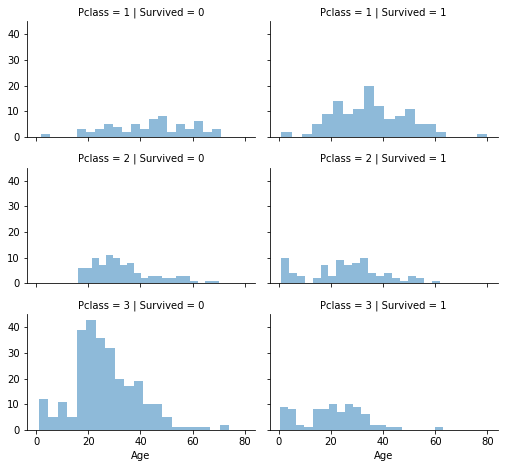

In [8]:
feature = "Pclass"
hist(feature)
age_hist(feature)

## SibSp/Survived

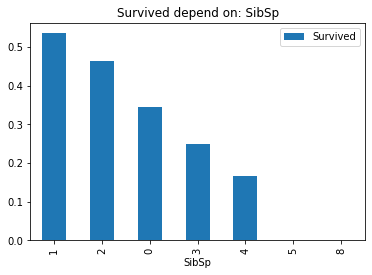

In [9]:
hist("SibSp")

## Parch/Survived

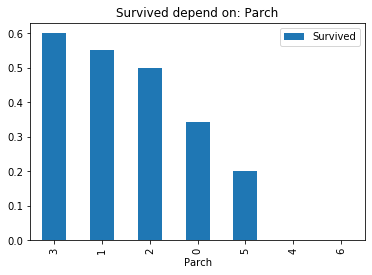

In [10]:
hist("Parch")

## Sex/Survived

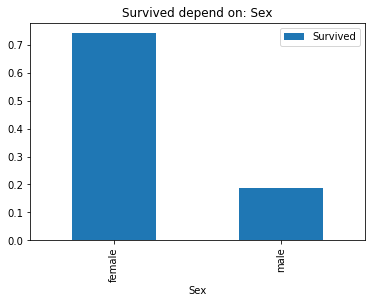

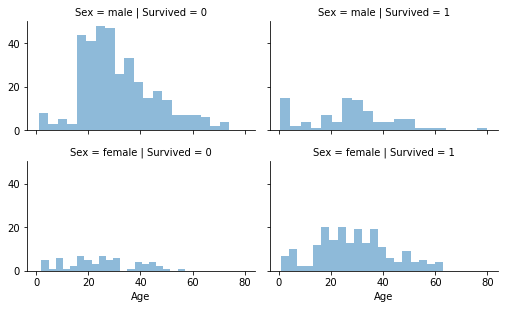

In [11]:
feature = "Sex"
hist(feature)
age_hist(feature)

## Age&Sex/Survived

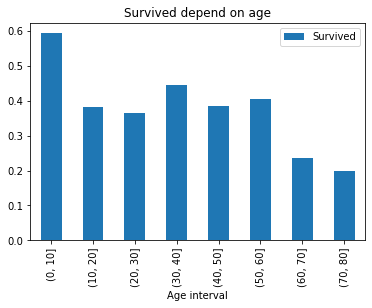

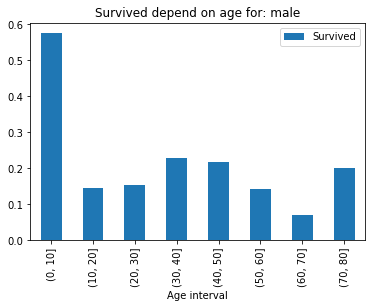

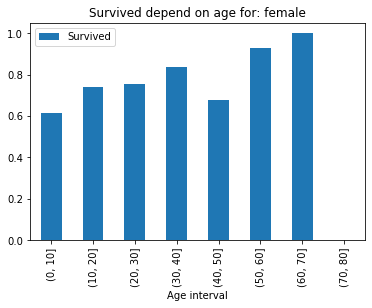

In [52]:
## Dont separate sex to keep all the plots in a tab
age_sex_survived = train_df[["Age", "Sex","Survived"]].dropna()
age_intervals = [index*10 for index in range(int(train_df["Age"].max()/10)+1)]
age_sex_survived["Age interval"] = pd.cut(age_sex_survived["Age"], age_intervals)
for_all_plot = age_sex_survived[["Age interval","Survived"]].groupby(["Age interval"], as_index=False) \
.mean().sort_values(by="Age interval",ascending=True)
for_all_plot.plot(kind="bar",x="Age interval",y="Survived", title = "Survived depend on age")

def hist_sex(sex):
    age_male_survived = age_sex_survived[age_sex_survived["Sex"] == sex]
    data_for_hist_sex = age_male_survived[["Age interval","Survived"]].groupby(["Age interval"], as_index=False) \
    .mean().sort_values(by="Age interval",ascending=True)
    data_for_hist_sex.plot(kind="bar",x="Age interval",y="Survived",title = ("Survived depend on age for: "+sex))

hist_sex("male")
hist_sex("female")

## Embarked analyzing

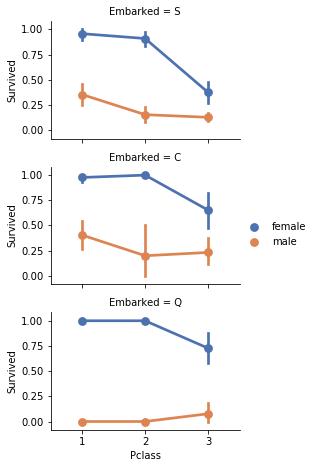

In [14]:
feature = "Embarked"
detailed_hist(feature)

## Fare analyzing

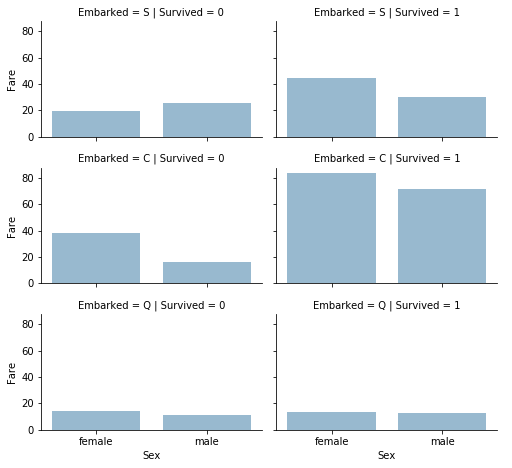

In [56]:
grid = sns.FacetGrid(train_df, row="Embarked", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", "Fare", alpha=.5, ci=None)
grid.add_legend()